<div class="jp-Cell-inputWrapper"><div class="jp-InputPrompt jp-InputArea-prompt">
</div><div class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput " data-mime-type="text/markdown">
<div style="background-color:#C5F0F0;padding:14px">
<p style="text-align:center"><font size="10px" color="#256180" face="Product Sans"><b>Exploratory Data_Analysis</b></font> </p>
</div>
</div>
</div>

In [25]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('bmh')
import re

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

In [26]:
df = pd.read_csv(r"C:\Users\GUDLA RAGUWING\Data Science Course\MagicBrics_Webscraping_project\Magicbrics_uncleaned.csv")

In [27]:
df.head()

,Unnamed: 0,index,City,Area,Owner,BHK,Floor,price,Carpet_Area,per_sqt
0,0,0,bangalore,Kattigenahalli,Omkar Pandey,3,FloorGround out of 4,₹60 Lac,1000.0,₹4950
1,1,1,bangalore,Ayodaya Nagar,gokul,2,FloorGround out of 4,₹80 Lac,1150.0,₹6957
2,2,2,bangalore,Electronic City,Thayumanavan,2,Floor4 out of 4,₹48 Lac,1060.0,₹4528
3,3,3,bangalore,Tumkur Road,Prasanna,3,Floor14 out of 15,₹1.35 Cr,1790.0,₹7542
4,4,4,bangalore,Kudlu Gate,Akash Akash,2,Floor2 out of 4,₹61 Lac,803.0,₹5706


In [28]:
df.drop(['Unnamed: 0','index'], axis = 1, inplace = True)

In [29]:
df.head()

,City,Area,Owner,BHK,Floor,price,Carpet_Area,per_sqt
0,bangalore,Kattigenahalli,Omkar Pandey,3,FloorGround out of 4,₹60 Lac,1000.0,₹4950
1,bangalore,Ayodaya Nagar,gokul,2,FloorGround out of 4,₹80 Lac,1150.0,₹6957
2,bangalore,Electronic City,Thayumanavan,2,Floor4 out of 4,₹48 Lac,1060.0,₹4528
3,bangalore,Tumkur Road,Prasanna,3,Floor14 out of 15,₹1.35 Cr,1790.0,₹7542
4,bangalore,Kudlu Gate,Akash Akash,2,Floor2 out of 4,₹61 Lac,803.0,₹5706


In [30]:
df = df[['City','Area','Owner','BHK','Floor','Carpet_Area','per_sqt','price']]

In [31]:
df.head()

,City,Area,Owner,BHK,Floor,Carpet_Area,per_sqt,price
0,bangalore,Kattigenahalli,Omkar Pandey,3,FloorGround out of 4,1000.0,₹4950,₹60 Lac
1,bangalore,Ayodaya Nagar,gokul,2,FloorGround out of 4,1150.0,₹6957,₹80 Lac
2,bangalore,Electronic City,Thayumanavan,2,Floor4 out of 4,1060.0,₹4528,₹48 Lac
3,bangalore,Tumkur Road,Prasanna,3,Floor14 out of 15,1790.0,₹7542,₹1.35 Cr
4,bangalore,Kudlu Gate,Akash Akash,2,Floor2 out of 4,803.0,₹5706,₹61 Lac


In [32]:
df.per_sqt=df.per_sqt.str.replace('₹', '')
df.price= df.price.str.replace('₹','')
df.price = df.price.str.replace('Cr','00000')
df.price = df.price.str.replace('Lac','00000')
df.price=df.price.str.replace('.','')
df.price=df.price.str.replace(' ','')
df.BHK = df.BHK.str.replace(' ','3')

In [33]:
df.rename(columns = {'price':'price_in_crores'}, inplace = True)

In [34]:
df.head()

,City,Area,Owner,BHK,Floor,Carpet_Area,per_sqt,price_in_crores
0,bangalore,Kattigenahalli,Omkar Pandey,3,FloorGround out of 4,1000.0,4950,6000000
1,bangalore,Ayodaya Nagar,gokul,2,FloorGround out of 4,1150.0,6957,8000000
2,bangalore,Electronic City,Thayumanavan,2,Floor4 out of 4,1060.0,4528,4800000
3,bangalore,Tumkur Road,Prasanna,3,Floor14 out of 15,1790.0,7542,13500000
4,bangalore,Kudlu Gate,Akash Akash,2,Floor2 out of 4,803.0,5706,6100000


In [35]:
df.isna().sum()

City                0
Area                0
Owner               1
BHK                 0
Floor               3
Carpet_Area         8
per_sqt            29
price_in_crores     0
dtype: int64

In [36]:
# Filling the Missing values

In [37]:
df.fillna(df.per_sqt.median(), axis =0, inplace = True )

In [38]:
df.fillna(df.Carpet_Area.median(),axis =0, inplace = True)

In [39]:
df.fillna(df.Floor.mode(), axis = 0, inplace = True)

In [40]:
df.isna().sum()

City               0
Area               0
Owner              0
BHK                0
Floor              0
Carpet_Area        0
per_sqt            0
price_in_crores    0
dtype: int64

In [41]:
df.dtypes

City                object
Area                object
Owner               object
BHK                 object
Floor               object
Carpet_Area        float64
per_sqt             object
price_in_crores     object
dtype: object

In [42]:
# Type Casting

In [43]:
df.BHK = df.BHK.astype(np.int64)
df.per_sqt = df.per_sqt.astype(np.float)
df.price_in_crores = df.price_in_crores.astype(np.int64)
df.Carpet_Area = df.Carpet_Area.astype(int)

In [44]:
# mathematical computation
df.price_in_crores=df.price_in_crores.values/10000000

In [45]:
df.dtypes

City                object
Area                object
Owner               object
BHK                  int64
Floor               object
Carpet_Area          int32
per_sqt            float64
price_in_crores    float64
dtype: object

In [46]:
df.head()

,City,Area,Owner,BHK,Floor,Carpet_Area,per_sqt,price_in_crores
0,bangalore,Kattigenahalli,Omkar Pandey,3,FloorGround out of 4,1000,4950.0,0.60
1,bangalore,Ayodaya Nagar,gokul,2,FloorGround out of 4,1150,6957.0,0.80
2,bangalore,Electronic City,Thayumanavan,2,Floor4 out of 4,1060,4528.0,0.48
3,bangalore,Tumkur Road,Prasanna,3,Floor14 out of 15,1790,7542.0,1.35
4,bangalore,Kudlu Gate,Akash Akash,2,Floor2 out of 4,803,5706.0,0.61


In [47]:
df.to_csv('MagicBrics_cleaned.csv')

### Check duplicate records

In [48]:
df.duplicated()
df.duplicated().value_counts() # No duplicates found in my Dataset

0      False
1      False
2      False
3      False
4      False
       ...  
415    False
416    False
417    False
418    False
419    False
Length: 420, dtype: bool

False    420
dtype: int64

## Univariate Analysis

In [49]:
df.describe()

,BHK,Carpet_Area,per_sqt,price_in_crores
count,420.000000,420.000000,4.200000e+02,420.000000
mean,2.378571,1271.316667,1.632564e+04,1.221786
std,0.754947,1020.836141,2.193673e+05,1.634996
min,1.000000,9.000000,1.500000e+03,0.010000
25%,2.000000,812.000000,3.295000e+03,0.377500
50%,2.000000,1072.500000,4.335000e+03,0.600000
75%,3.000000,1469.750000,5.734000e+03,1.200000
max,5.000000,13750.000000,4.500000e+06,10.900000


## ♦ Intution
<div class="alert alert-block alert-info">
    * <i>Look at the mean and median for each numerical feature, if the mean is away from the median it represents the presence of outliers.
          If the mean and median are close meaning the outliers are very few and can be neglected, but sometimes the difference may seem less but the impact of outliers can be large
        , so its better to go for all the possible ways to identify them.</i><br>
    </div>

## Skewness:
**Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed.**


* Less than -1 or greater than 1, then the distribution is highly skewed.
* Between -1 and -0.5 or 0.5 and 1, then the distribution is moderately skewed.
* Between -0.5 and 0.5, then the distribution is approx. symmetric.
* When skewness = 0, then the data is perfrctly symmetric.

In [50]:
df.skew()

BHK                 0.351093
Carpet_Area         6.739769
per_sqt            20.475885
price_in_crores     2.750480
dtype: float64

In [51]:
import scipy.stats as stats

Q1, Q2, Q3 = tuple(df.per_sqt.quantile(q = [0.10,0.50,0.75]).values)

print(Q1, Q2, Q3)

IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR

print(IQR, UL, LL)


df[(df.per_sqt > UL) | (df.per_sqt < LL)]

2536.4 4335.0 5734.0
3197.6 10530.4 -2259.9999999999995


,City,Area,Owner,BHK,Floor,Carpet_Area,per_sqt,price_in_crores
7,bangalore,Begur Road,ganga k,3,Basement out of 17,1588,11335.0,1.80
11,bangalore,Koramangala Block 1,Rahul Jain,3,Floor16 out of 16,1418,20632.0,3.85
21,bangalore,,tezal,4,Floor1 out of 4,1900,12500.0,1.80
29,bangalore,Yelahanka,Sashank Constructions,2,FloorGround out of 4,331,26471.0,5.12
30,mumbai,Daulat Nagar,K SH,1,Floor8 out of 9,310,23276.0,0.73
31,mumbai,Samel Pada,NIYATI,1,Floor1 out of 5,610,16667.0,0.22
33,mumbai,Goregaon West,Motashaw Motashaw,3,Floor4 out of 7,665,23636.0,2.70
34,mumbai,Vasai East,MONCY BHASKAR,1,FloorGround out of 76,1052,37500.0,0.41
35,mumbai,Worli,Anam khan,3,Floor4 out of 4,685,27136.0,5.99
36,mumbai,Kurla East,Milind Desai,2,FloorGround out of 3,400,18545.0,1.20


In [52]:
df = df[(df.per_sqt >= Q1 - 1.5*IQR) & (df.per_sqt <= Q3 + 1.5*IQR)]

In [53]:
import scipy.stats as stats

Q1, Q2, Q3 = tuple(df.Carpet_Area.quantile(q = [0.10,0.50,0.75]).values)

print(Q1, Q2, Q3)

IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR

print(IQR, UL, LL)


df[(df.Carpet_Area > UL) | (df.Carpet_Area < LL)]

650.0 1087.5 1465.0
815.0 2687.5 -572.5


,City,Area,Owner,BHK,Floor,Carpet_Area,per_sqt,price_in_crores
119,visakhapatnam,MVP Colony,Dinakar,2,4335.0,4335,4335.0,0.78
154,haridwar,Laksar Road,Shakti Verma,1,Floor1 out of 4,3000,2192.0,1.43
209,vadodara,,Jiten chokshi,4,4335.0,4335,4615.0,1.20
218,greater-noida,Yamuna Expressway,Harkesh Sharma,1,Floor1 out of 4,4335,4091.0,0.15
221,greater-noida,Chi 5,AN SINHA,4,Floor11 out of 22,3210,6533.0,2.10
222,greater-noida,Jaypee Greens,Nihit,4,Floor6 out of 34,3441,6542.0,3.31
239,greater-noida,Yamuna Expressway,Sandeep Jain,3,Floor25 out of 25,13750,3636.0,0.50
255,gurgaon,New Colony,Rahul,3,Floor4 out of 9,4335,8213.0,0.85
259,gurgaon,Sector 37C,Ravinder Chauhan,2,Floor8 out of 10,10372,6503.0,0.93
269,gurgaon,Sector 65,Manjunath S,3,FloorGround out of 32,3069,4335.0,0.05


In [54]:
df = df[(df.Carpet_Area >= Q1 - 1.5*IQR) & (df.Carpet_Area <= Q3 + 1.5*IQR)]

In [55]:
import scipy.stats as stats

Q1, Q2, Q3 = tuple(df.price_in_crores.quantile(q = [0.10,0.50,0.75]).values)

print(Q1, Q2, Q3)

IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR

print(IQR, UL, LL)


df[(df.price_in_crores > UL) | (df.price_in_crores < LL)]

0.24 0.59 0.98
0.74 2.09 -0.8699999999999999


,City,Area,Owner,BHK,Floor,Carpet_Area,per_sqt,price_in_crores
22,bangalore,Jaya Nagar Block 3,shravan,3,Floor2 out of 4,1460,7705.0,2.75
28,bangalore,Haralur Ma,Shekar,3,Floor3 out of 3,740,4650.0,2.10
32,mumbai,Borivali West,Sachin Kunder,2,Floor5 out of 15,1160,4335.0,2.25
39,mumbai,Mahim West,Satyajit Satyajit,2,Floor6 out of 12,800,4335.0,3.75
57,mumbai,Andheri East,DHRUV SHARMA,2,Floor1 out of 11,935,5000.0,2.52
79,chennai,Chennai,sakthi,2,Floor1 out of 3,778,6198.0,2.97
89,chennai,Chennai,PURUSHOTHAMAN,2,Floor10 out of 16,1300,4000.0,7.49
90,visakhapatnam,,Hari,3,Floor15 out of 16,823,4667.0,4.75
95,visakhapatnam,Madhurwada,Lakshman,3,Floor1 out of 5,1150,3046.0,6.36
100,visakhapatnam,,Ravindra Pamidi,3,Floor2 out of 5,600,3750.0,9.75


In [56]:
df = df[(df.price_in_crores >= Q1 - 1.5*IQR) & (df.price_in_crores <= Q3 + 1.5*IQR)]

In [57]:
df.reset_index(inplace=True)

In [58]:
df.drop('index',axis = 1, inplace = True)

In [59]:
df

,City,Area,Owner,BHK,Floor,Carpet_Area,per_sqt,price_in_crores
0,bangalore,Kattigenahalli,Omkar Pandey,3,FloorGround out of 4,1000,4950.0,0.60
1,bangalore,Ayodaya Nagar,gokul,2,FloorGround out of 4,1150,6957.0,0.80
2,bangalore,Electronic City,Thayumanavan,2,Floor4 out of 4,1060,4528.0,0.48
3,bangalore,Tumkur Road,Prasanna,3,Floor14 out of 15,1790,7542.0,1.35
4,bangalore,Kudlu Gate,Akash Akash,2,Floor2 out of 4,803,5706.0,0.61
...,...,...,...,...,...,...,...,...
319,mysore,,Nayana A.S,2,FloorGround out of 3,1070,6389.0,0.40
320,mysore,Kuvempunagar,Srikanth,2,Floor1 out of 3,1080,5000.0,0.69
321,mysore,,MANJUNATHA,2,FloorGround out of 2,1200,4335.0,0.60
322,mysore,V V Mohalla,Chakko,2,FloorGround out of 5,900,6667.0,0.60


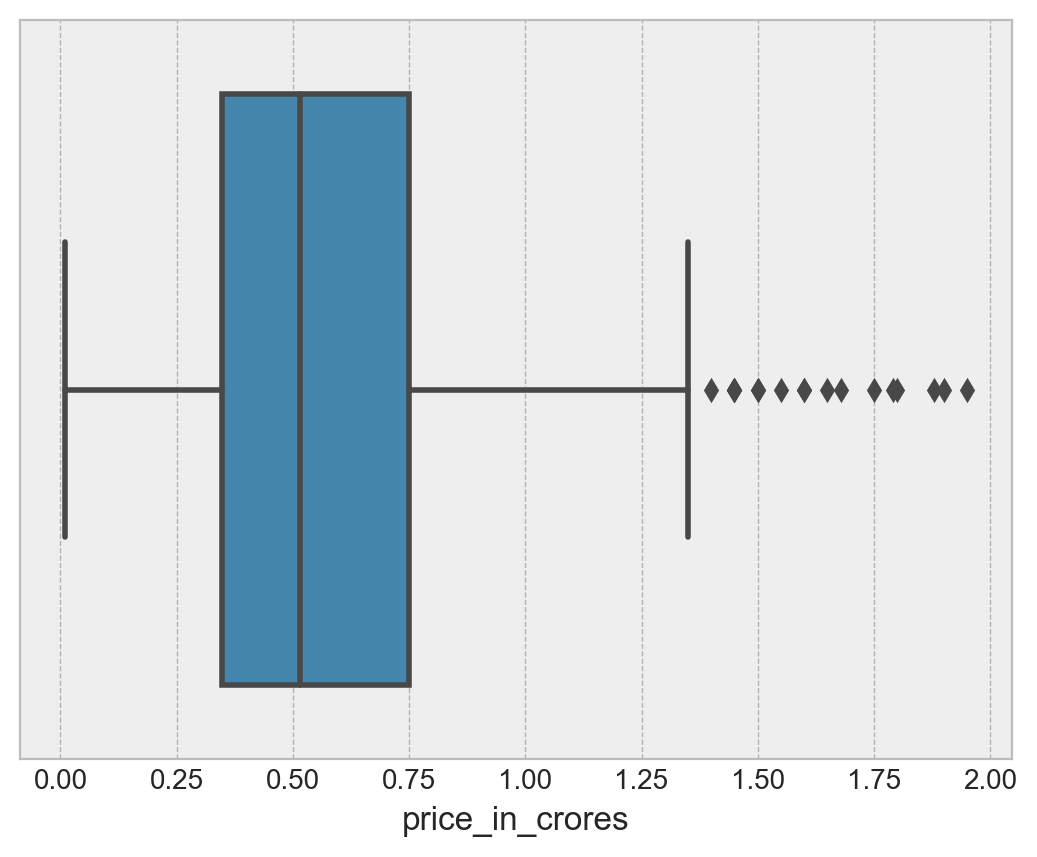

In [60]:
sns.boxplot(x = 'price_in_crores', data = df);

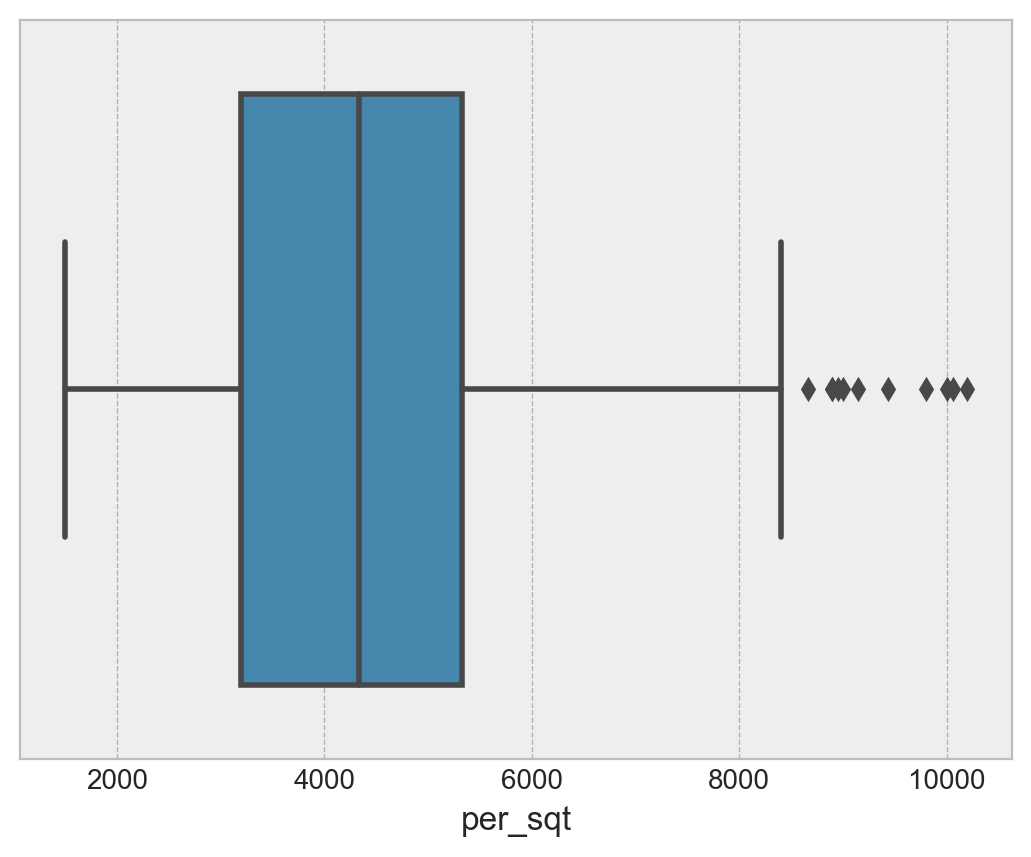

In [61]:
sns.boxplot(x = 'per_sqt', data = df);

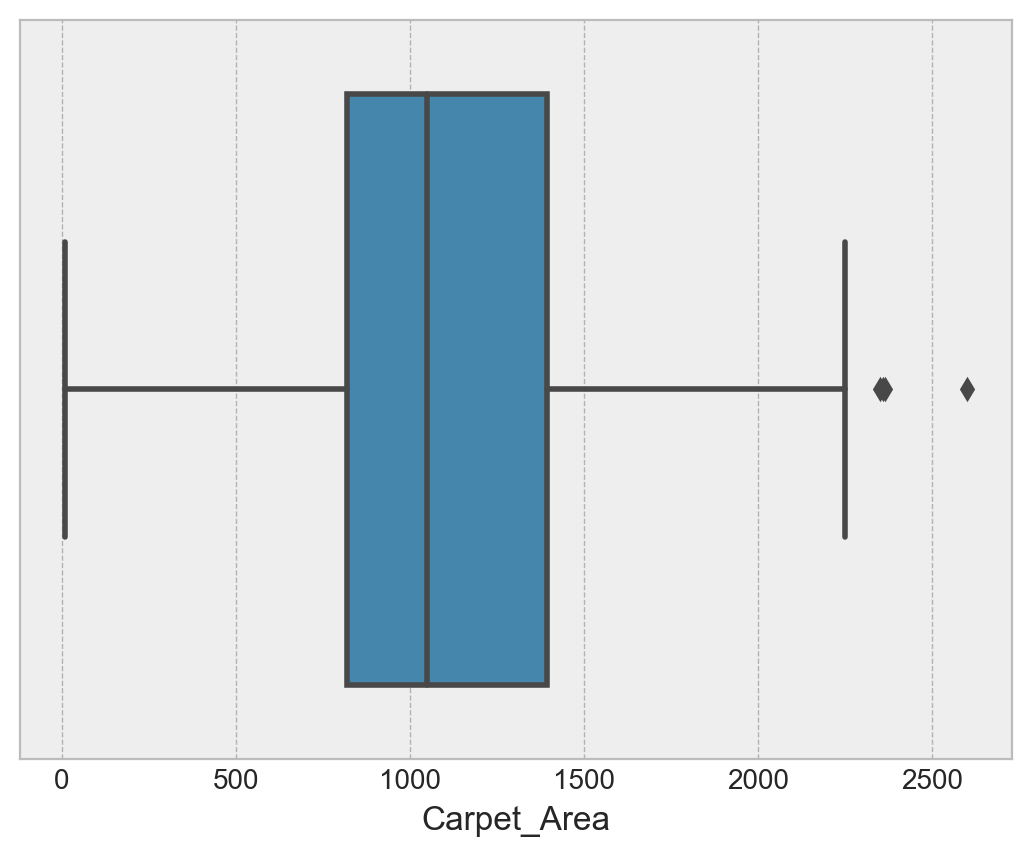

In [62]:
sns.boxplot(x = 'Carpet_Area', data = df);

In [63]:
df.skew()

BHK                0.328239
Carpet_Area        0.589380
per_sqt            0.870879
price_in_crores    1.266679
dtype: float64

## ♦ Observation
<div class="alert alert-block alert-info">
    * <i>After the removal of outliers from the dataset, now you can see the skewness of the features are looking good
     and the boxplots are good, there are some outliers but in actual they are not cause the apartment in highly developed area can be high.</i><br>
    </div>

## Bivariate Analysis

### Plot the Scatter plots to understand the relation between inputs and output feature

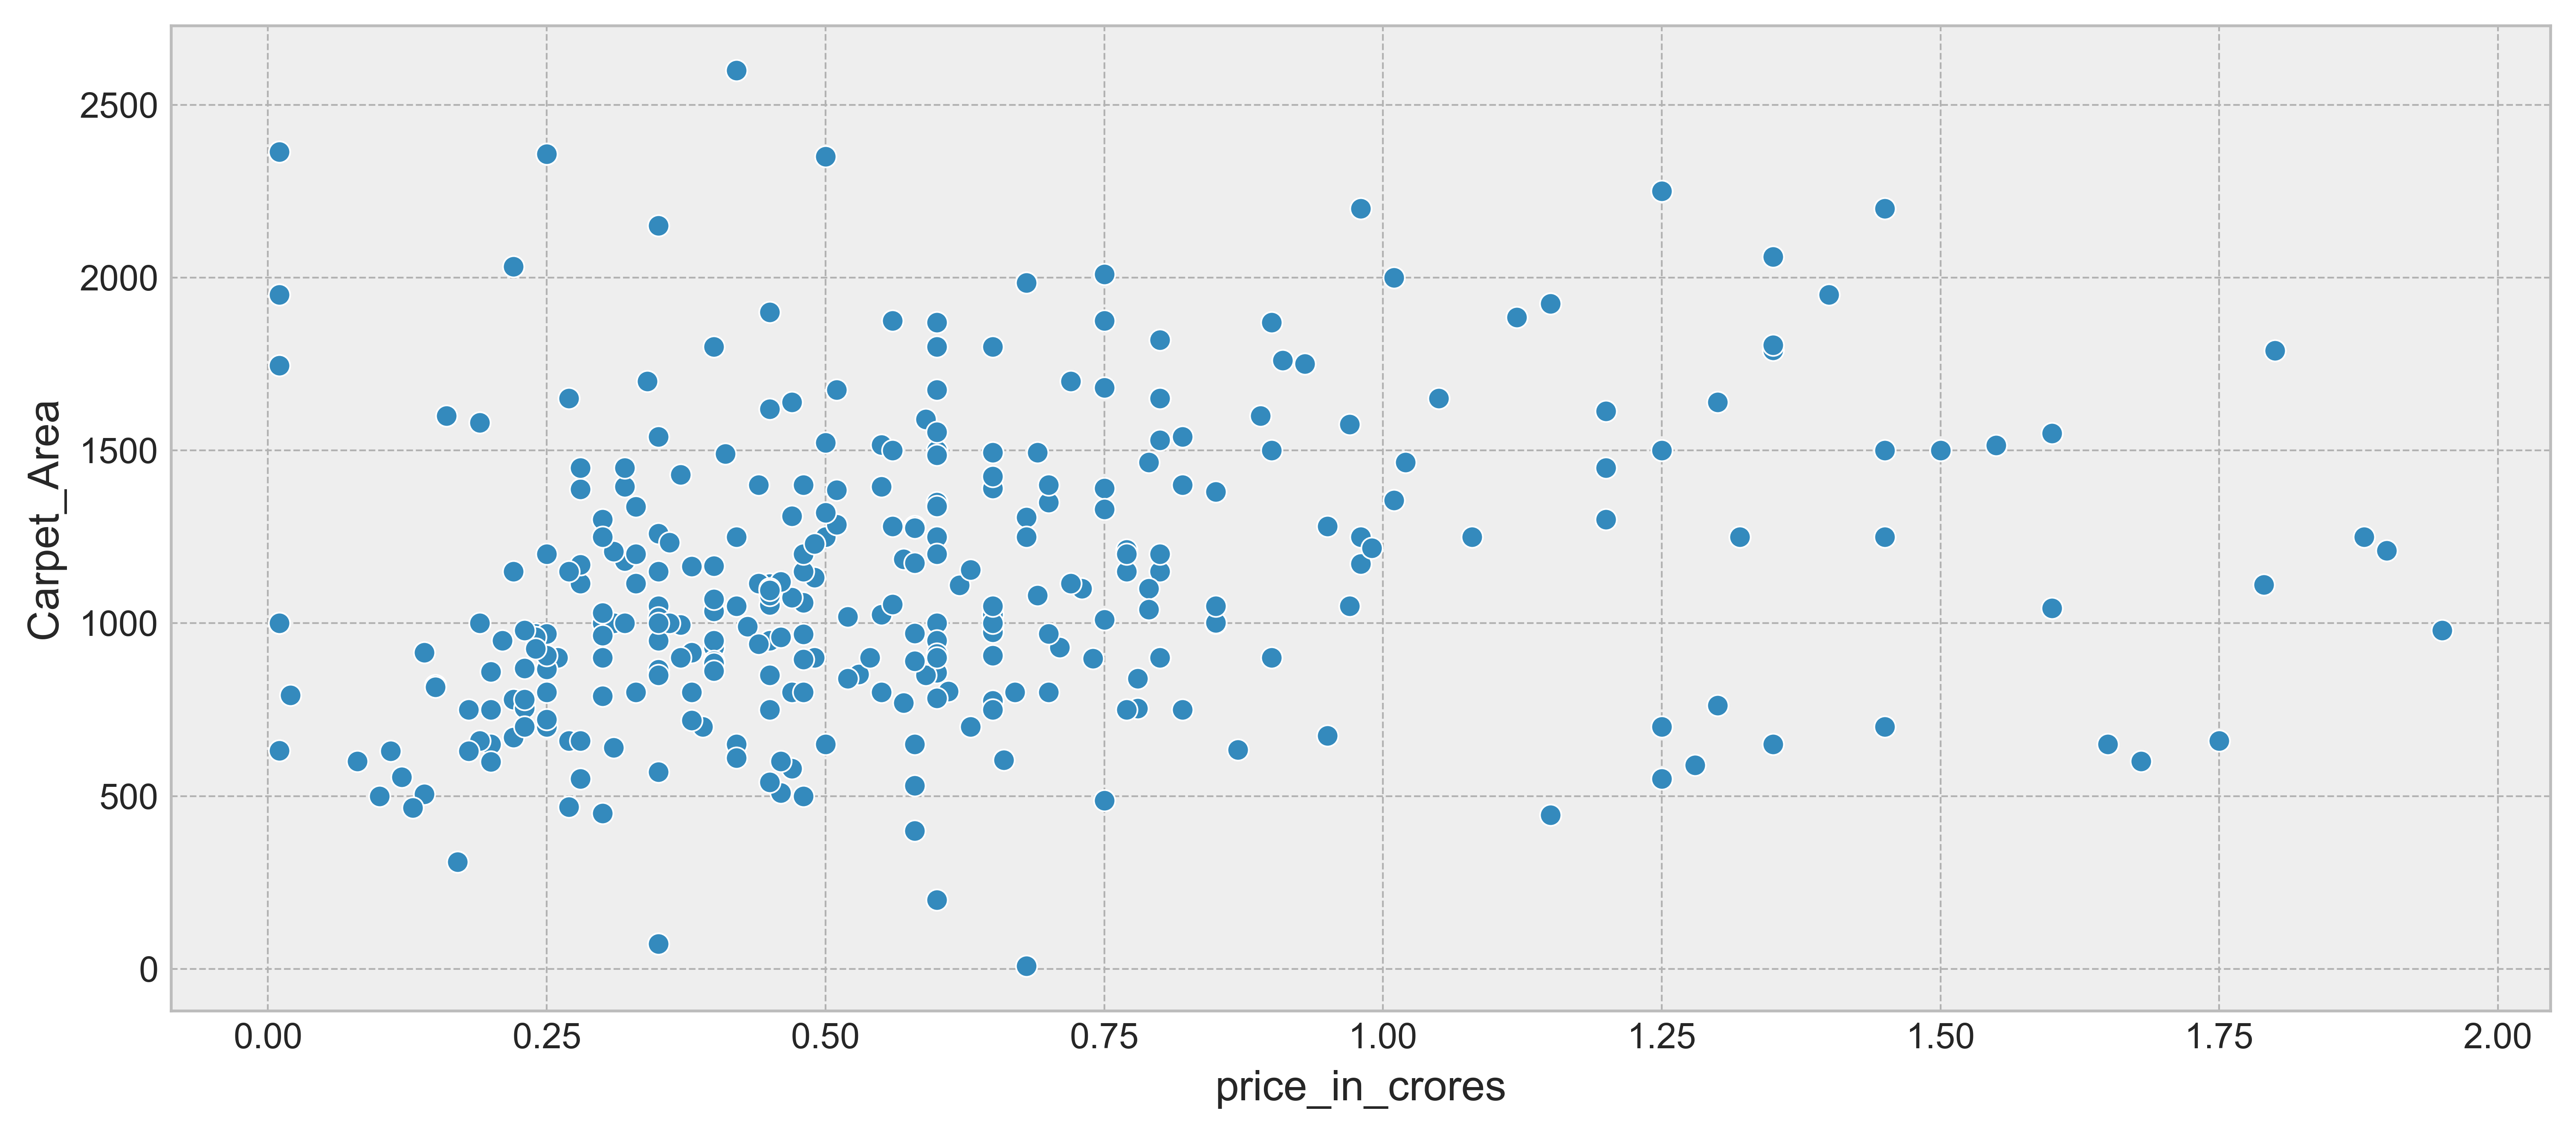

In [64]:
plt.figure(figsize=(12,5), dpi = 300)
sns.scatterplot(x = 'price_in_crores', y='Carpet_Area', data = df);

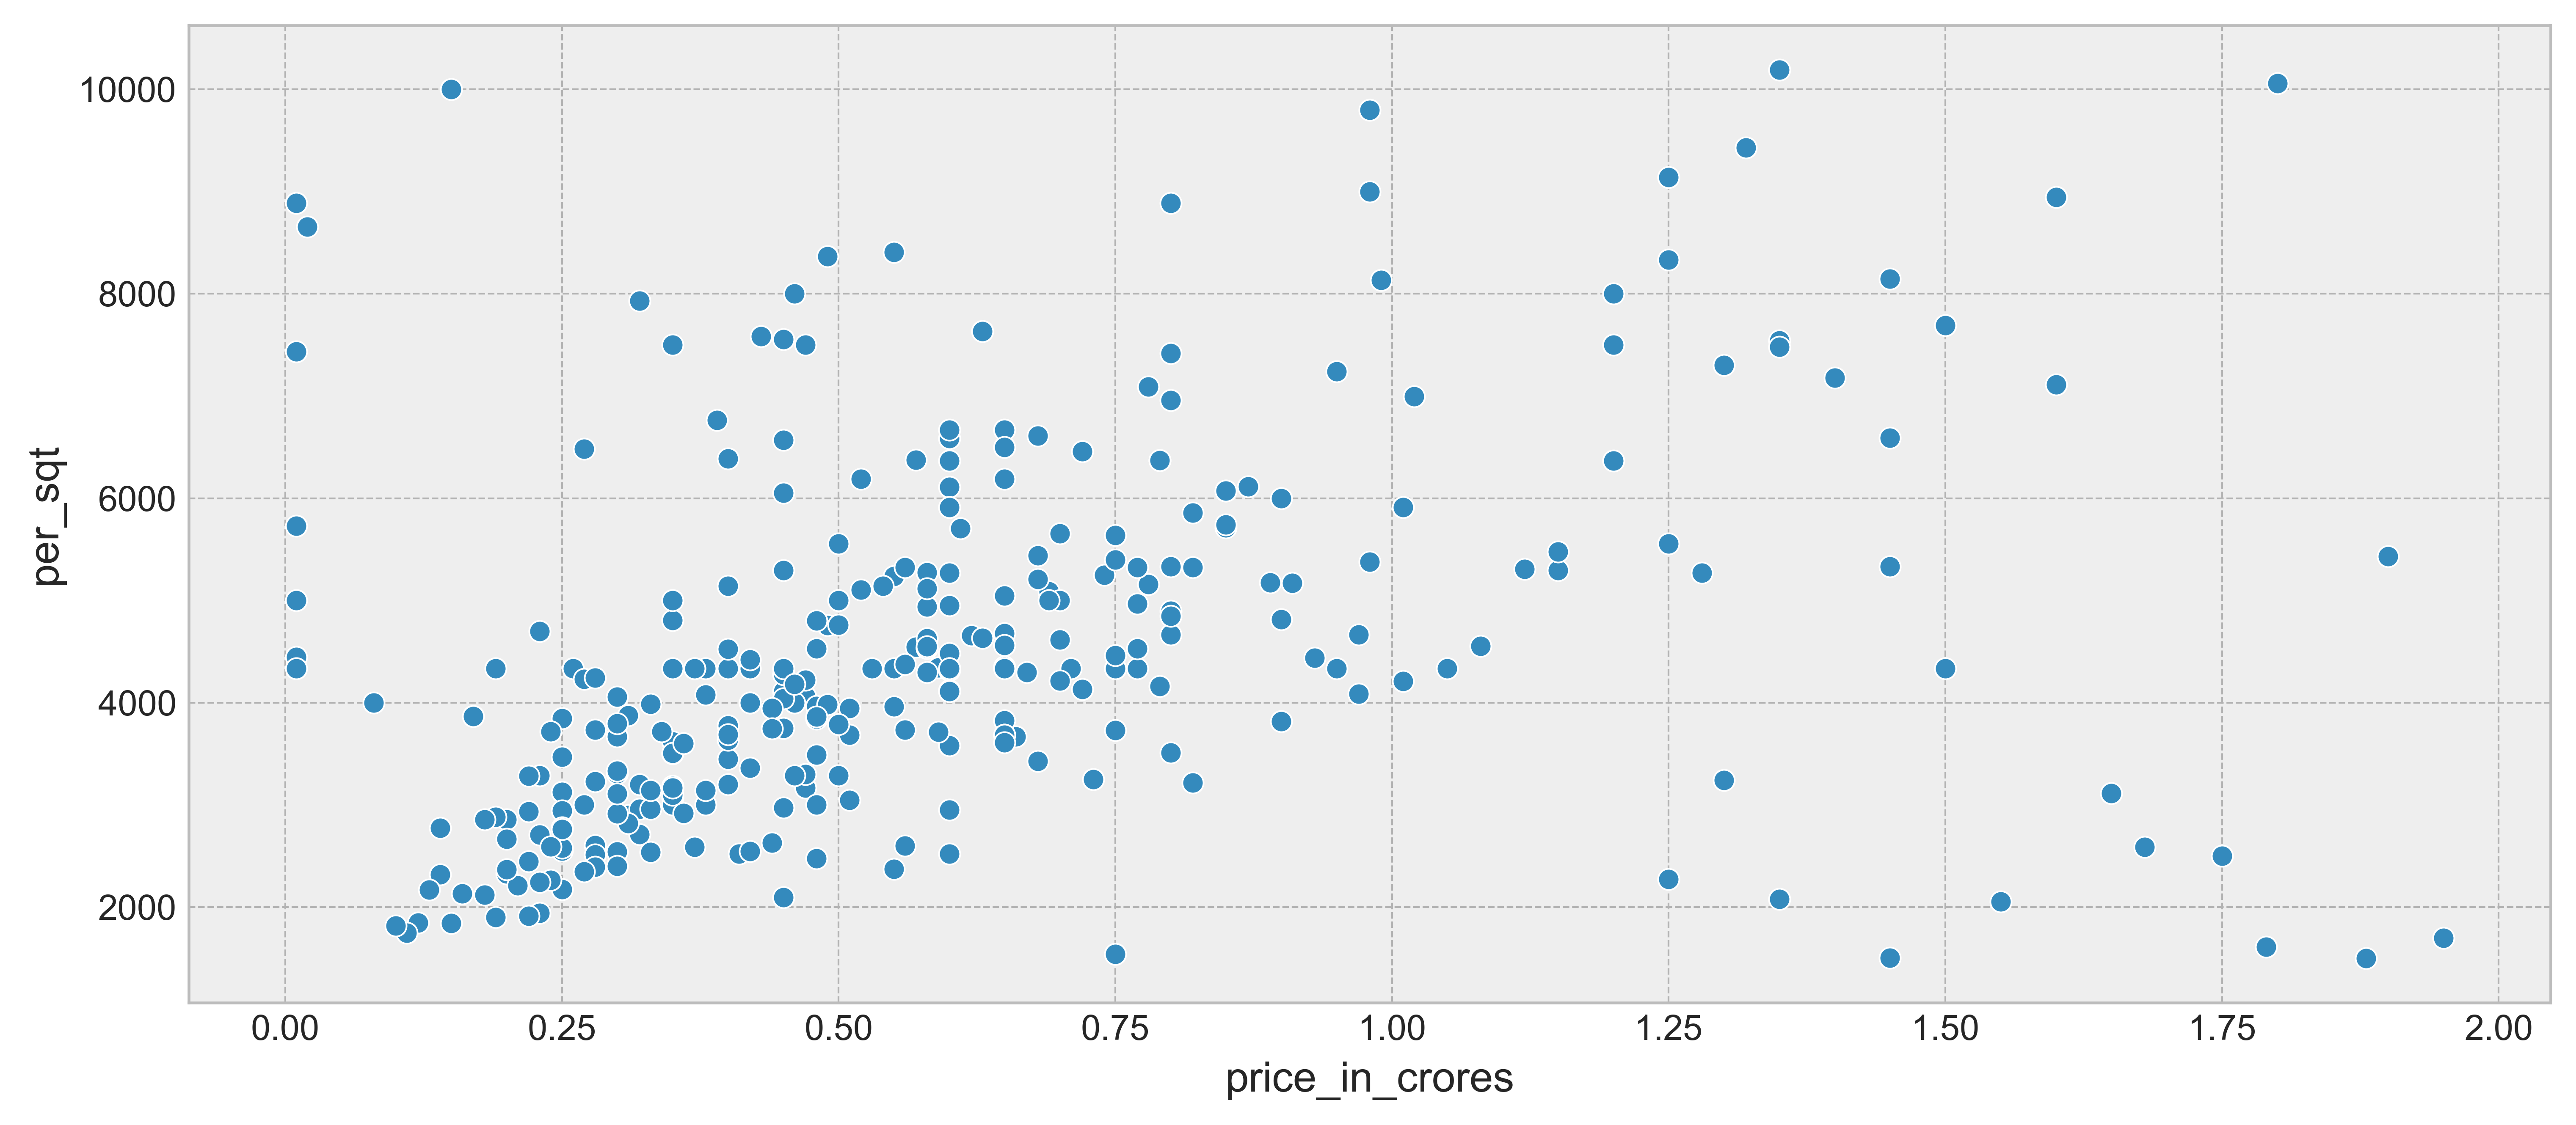

In [65]:
plt.figure(figsize=(12,5), dpi = 300)
sns.scatterplot(x = 'price_in_crores', y='per_sqt', data = df);

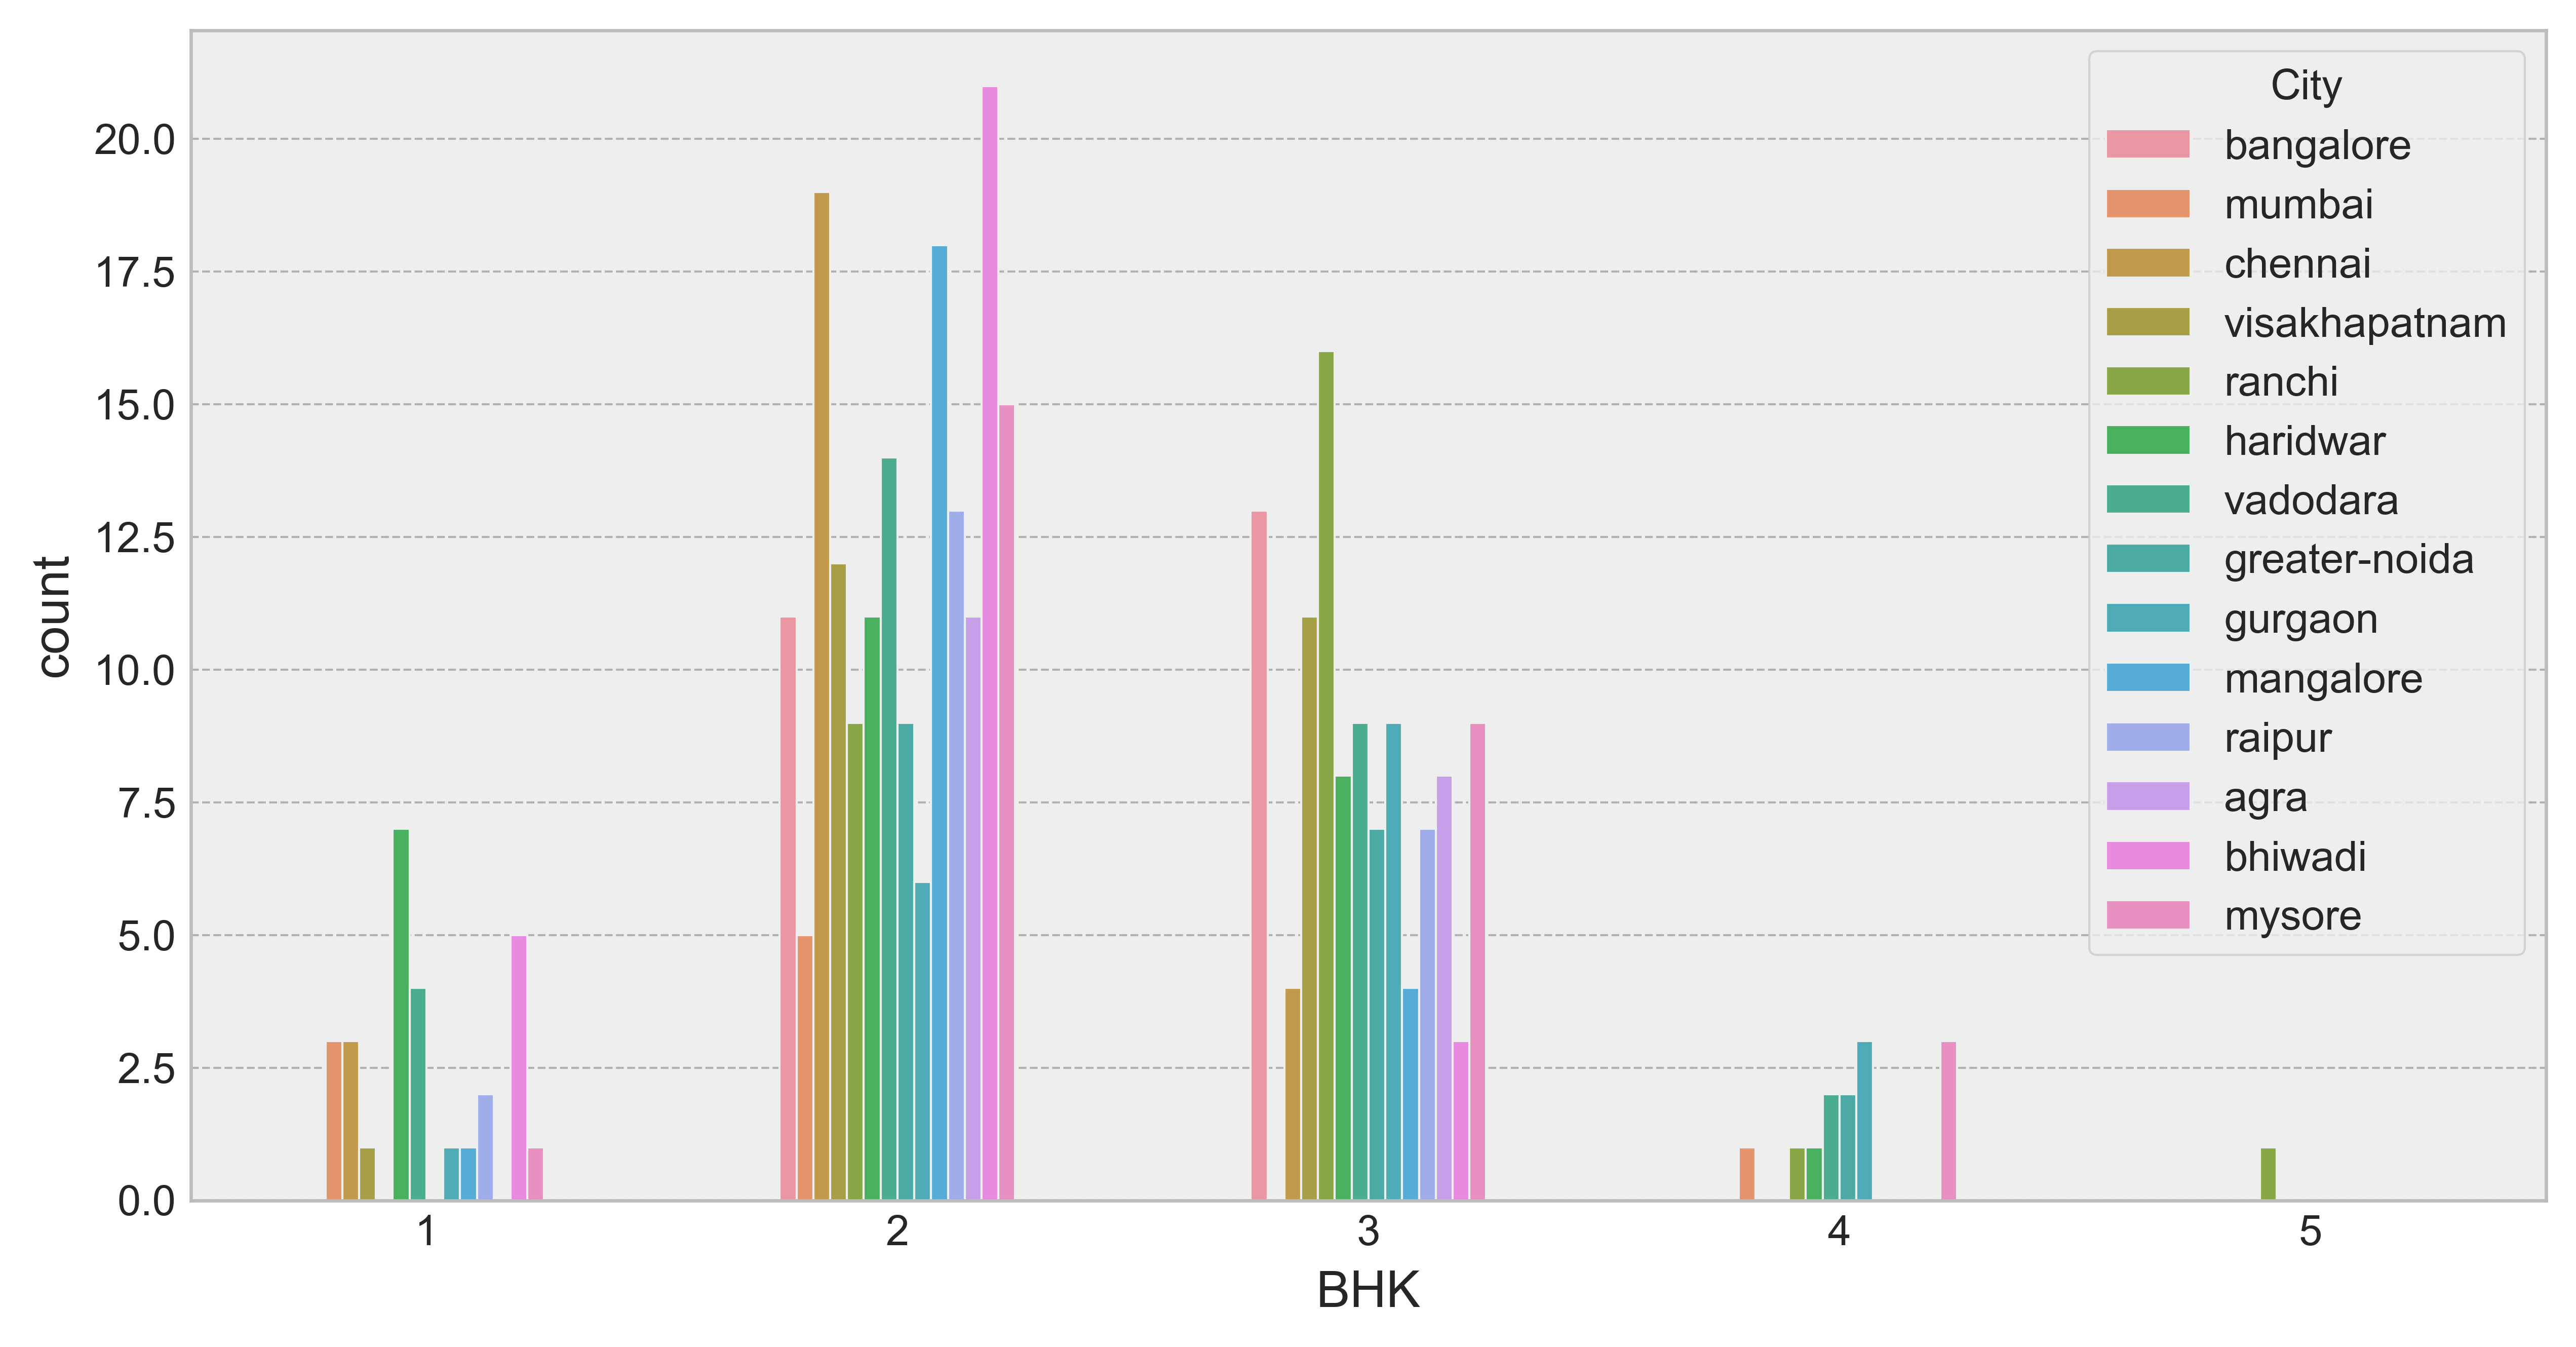

In [66]:
plt.figure(figsize=(10,5), dpi = 300)
sns.countplot(x='BHK', data =df, width = 0.5, hue = 'City');

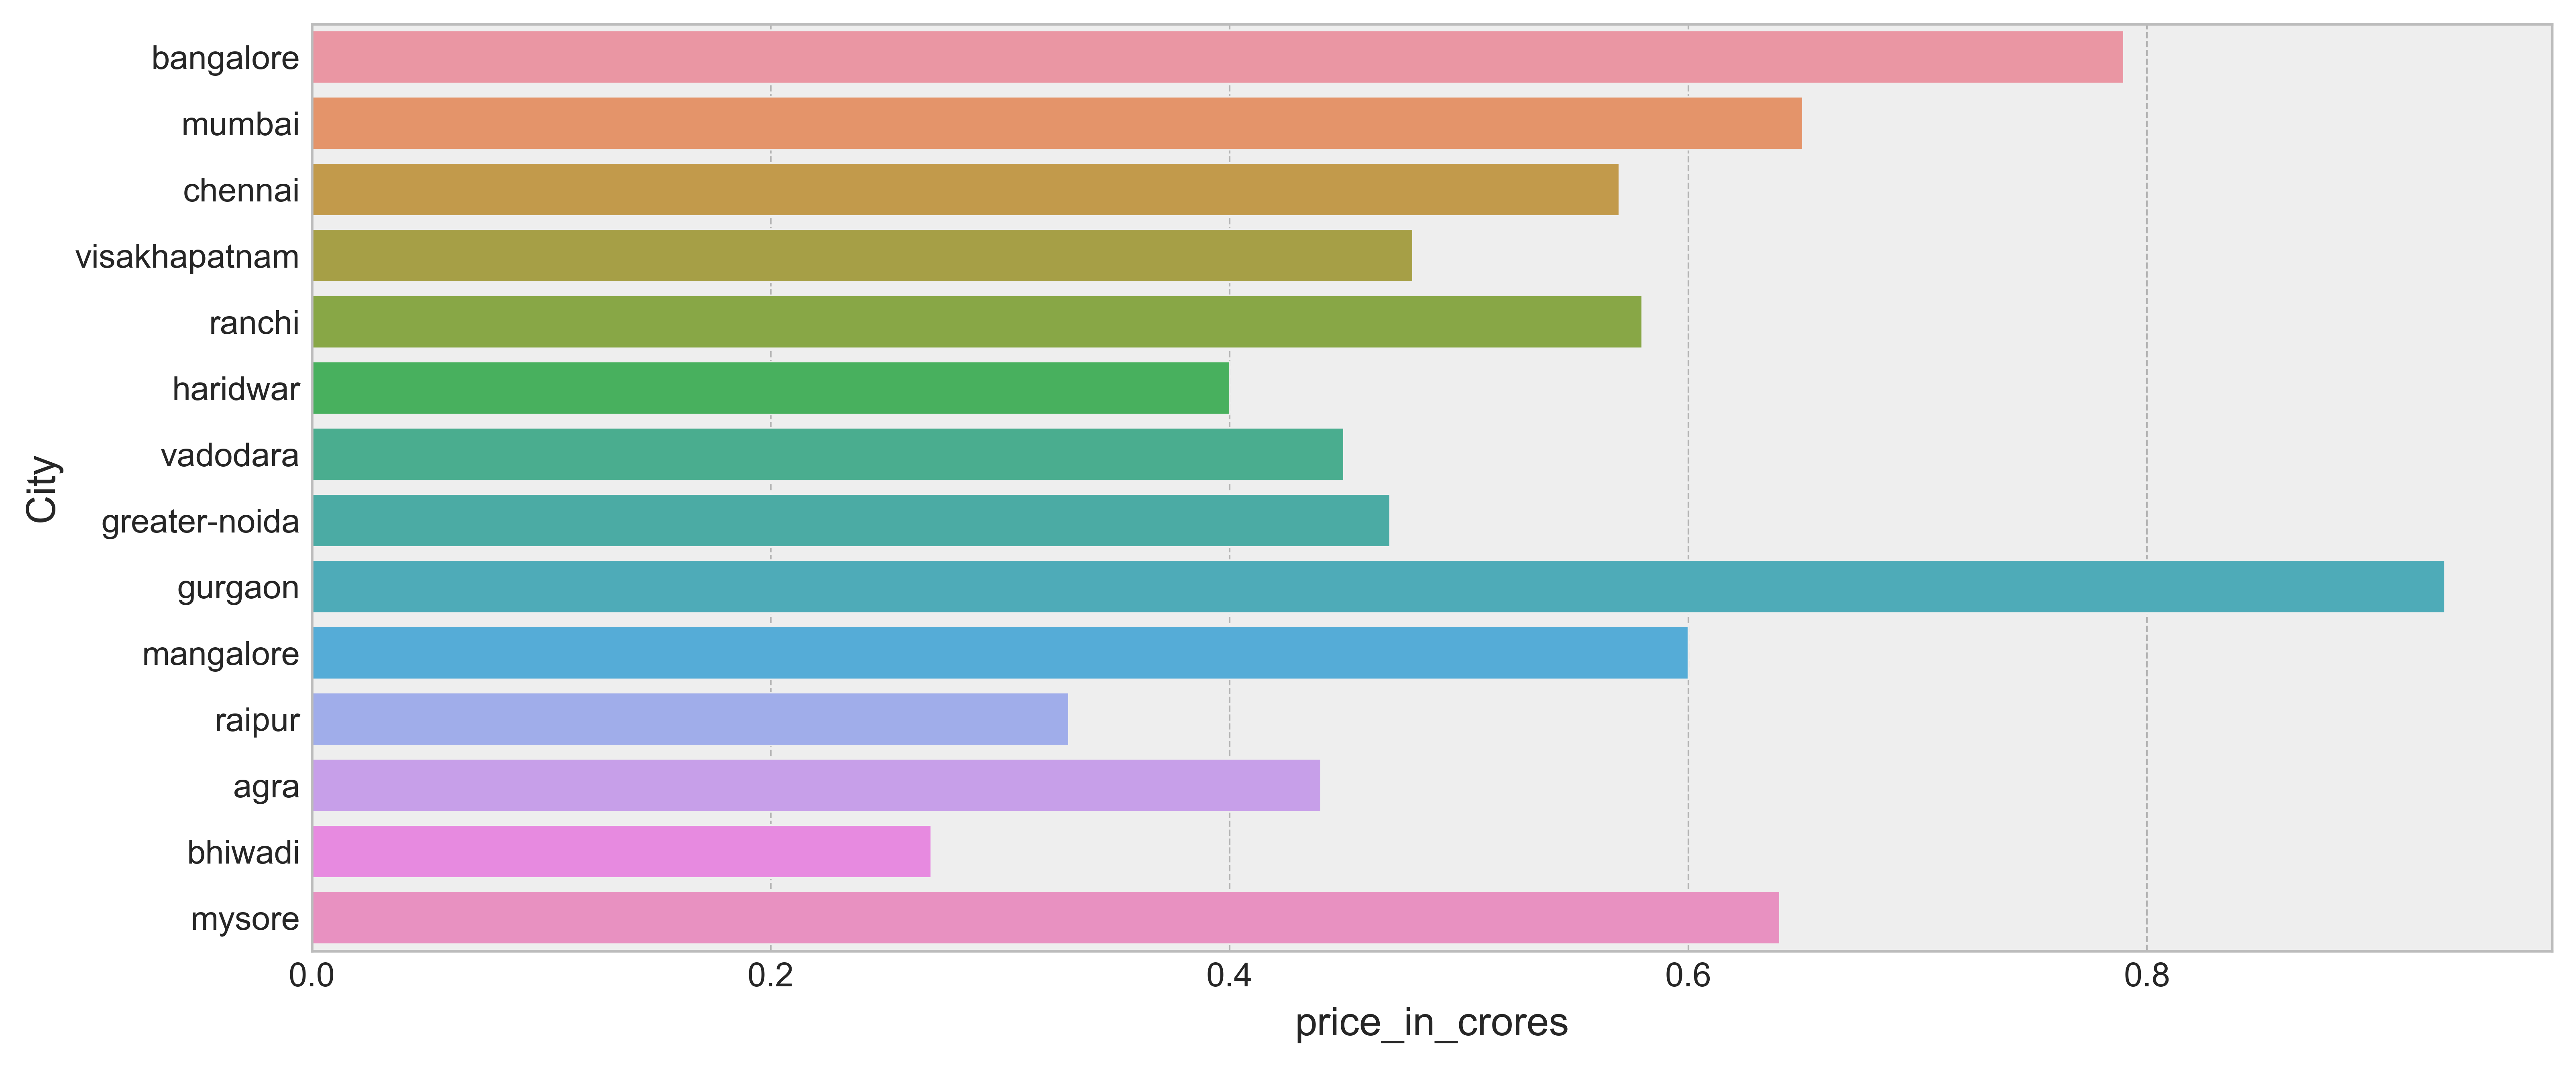

In [67]:
plt.figure(figsize=(12,5), dpi = 300)
sns.barplot(x=df.price_in_crores, y= df.City, ci= False, estimator='median' );

In [68]:
df_cor = df.corr()

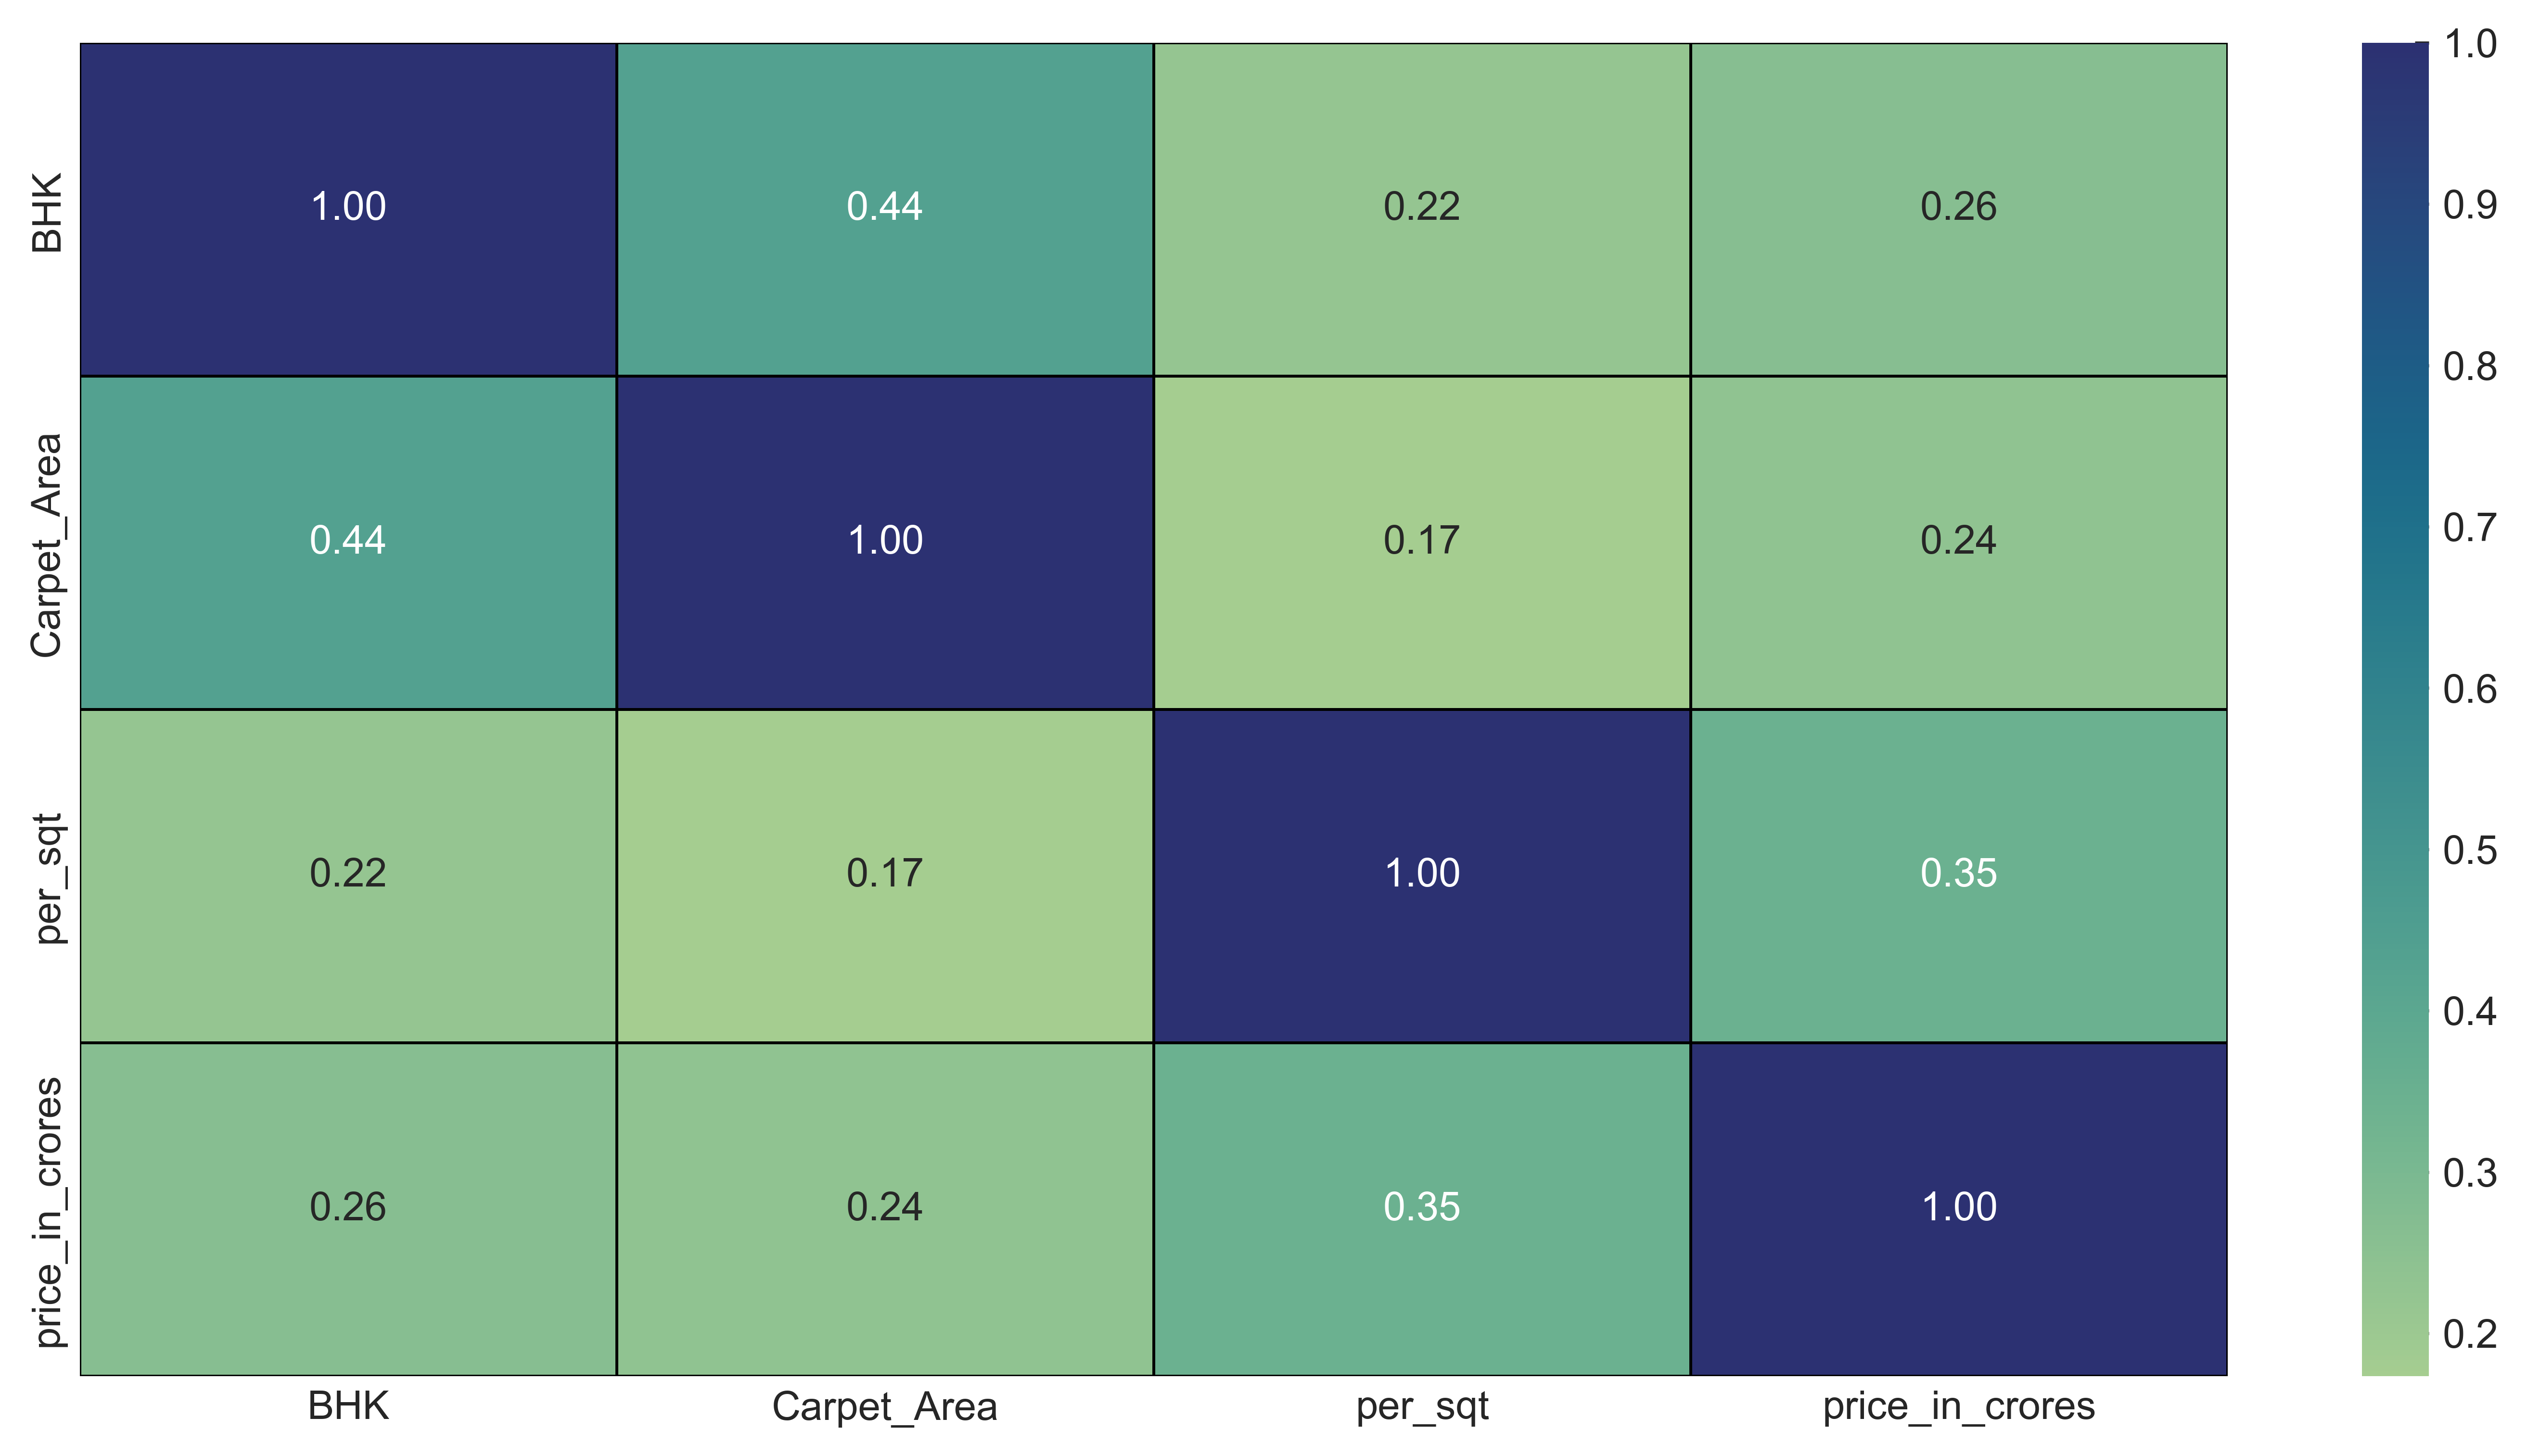

In [69]:
plt.figure(figsize=(12,6), dpi=300)
sns.heatmap(df_cor, annot=True, fmt = '.2f', linewidths=0.5, cmap='crest', linecolor='black');

# fmt=d for integers; fmt = .2f for float with 2 decimals

## ♦ Model Building
## ML-Pipe Line

1. Segregate the output and input features
2. Split the data into train and test
3. performe data preparation on X_train and X_test
4. Perform K-fold cross validation to get the best hyperparameter 
5. Model Building 
6. Predictions using the model
7. Evaluation of the model using the appropriate Evaluation Metric

In [74]:
df.head()

,City,Area,Owner,BHK,Floor,Carpet_Area,per_sqt,price_in_crores
0,bangalore,Kattigenahalli,Omkar Pandey,3,FloorGround out of 4,1000,4950.0,0.60
1,bangalore,Ayodaya Nagar,gokul,2,FloorGround out of 4,1150,6957.0,0.80
2,bangalore,Electronic City,Thayumanavan,2,Floor4 out of 4,1060,4528.0,0.48
3,bangalore,Tumkur Road,Prasanna,3,Floor14 out of 15,1790,7542.0,1.35
4,bangalore,Kudlu Gate,Akash Akash,2,Floor2 out of 4,803,5706.0,0.61


In [75]:
y=df['price_in_crores']
X=df[['City','BHK','Carpet_Area','per_sqt']]

In [77]:
y.head()

0    0.60
1    0.80
2    0.48
3    1.35
4    0.61
Name: price_in_crores, dtype: float64

In [79]:
X.head()

,City,BHK,Carpet_Area,per_sqt
0,bangalore,3,1000,4950.0
1,bangalore,2,1150,6957.0
2,bangalore,2,1060,4528.0
3,bangalore,3,1790,7542.0
4,bangalore,2,803,5706.0


In [80]:
# splitting the historical data into train and test.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=27)

In [81]:
X_train.dtypes # viewing the datatypes to seperate them

City            object
BHK              int64
Carpet_Area      int32
per_sqt        float64
dtype: object

In [82]:
X_train_cat = X_train.select_dtypes(include = ['object']) # segregating the object feature 

In [83]:
X_train_cat.head()

,City
40,chennai
299,mysore
183,greater-noida
199,gurgaon
285,bhiwadi


In [84]:
X_train_num = X_train.select_dtypes(include = ['int64', 'float64']) # segregating the Numerical feature

In [85]:
X_train_num.head()

,BHK,per_sqt
40,2,4335.0
299,2,6611.0
183,2,2960.0
199,4,7111.0
285,2,1503.0


In [86]:
X_test_cat = X_test.select_dtypes(include = ['object'])
X_test_cat.head()

,City
12,bangalore
169,greater-noida
265,agra
18,bangalore
77,visakhapatnam


In [87]:
X_test_num = X_test.select_dtypes(include = ['int64', 'float64'])
X_test_num.head()

,BHK,per_sqt
12,2,9800.0
169,2,2474.0
265,3,2592.0
18,2,7500.0
77,3,4667.0


In [88]:
# scaling the numerical features on the Training Data
from sklearn.preprocessing import StandardScaler

Std_scaler = StandardScaler()

# feature names will be (annoyingly) lost after Scaling the data
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_trns = pd.DataFrame(Std_scaler.fit_transform(X_train_num),
                                     columns = X_train_num.columns,
                                     index = X_train_num.index)
X_train_num_trns.head()

,BHK,per_sqt
40,-0.460648,-0.076952
299,-0.460648,1.254168
183,-0.460648,-0.881121
199,2.278997,1.546593
285,-0.460648,-1.733248


In [89]:
X_test_num_trns = pd.DataFrame(Std_scaler.transform(X_test_num),
                                     columns = X_test_num.columns,
                                     index = X_test_num.index)
X_test_num_trns.head()

,BHK,per_sqt
12,-0.460648,3.119256
169,-0.460648,-1.165359
265,0.909174,-1.096346
18,-0.460648,1.774100
77,0.909174,0.117219


In [90]:
# Applying the OneHotEncoding on the categorical columns 

from sklearn.preprocessing import OneHotEncoder

encoder_ohe = OneHotEncoder(drop='first', sparse=False)

# feature names will be (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder_ohe.fit_transform(X_train_cat), 
                               columns=encoder_ohe.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,City_bangalore,City_bhiwadi,City_chennai,City_greater-noida,City_gurgaon,City_haridwar,City_mangalore,City_mumbai,City_mysore,City_raipur,City_ranchi,City_vadodara,City_visakhapatnam
40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
183,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
X_test_cat_ohe = pd.DataFrame(encoder_ohe.transform(X_test_cat), 
                               columns=encoder_ohe.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,City_bangalore,City_bhiwadi,City_chennai,City_greater-noida,City_gurgaon,City_haridwar,City_mangalore,City_mumbai,City_mysore,City_raipur,City_ranchi,City_vadodara,City_visakhapatnam
12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [92]:
X_train_transform = pd.concat([X_train_num_trns,X_train_cat_ohe], axis = 1)
X_train_transform.head()

,BHK,per_sqt,City_bangalore,City_bhiwadi,City_chennai,City_greater-noida,City_gurgaon,City_haridwar,City_mangalore,City_mumbai,City_mysore,City_raipur,City_ranchi,City_vadodara,City_visakhapatnam
40,-0.460648,-0.076952,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299,-0.460648,1.254168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
183,-0.460648,-0.881121,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199,2.278997,1.546593,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,-0.460648,-1.733248,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
X_test_transform = pd.concat([X_test_num_trns,X_test_cat_ohe], axis = 1)
X_test_transform.head()

,BHK,per_sqt,City_bangalore,City_bhiwadi,City_chennai,City_greater-noida,City_gurgaon,City_haridwar,City_mangalore,City_mumbai,City_mysore,City_raipur,City_ranchi,City_vadodara,City_visakhapatnam
12,-0.460648,3.119256,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,-0.460648,-1.165359,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
265,0.909174,-1.096346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,-0.460648,1.774100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,0.909174,0.117219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [115]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transform, y_train)

RandomForestRegressor()

### Residual Analysis on Training data

In [116]:
y_train_pred = regressor.predict(X_train_transform)

In [117]:
from sklearn import metrics
print(metrics.r2_score(y_train, y_train_pred))

0.8958100528401837


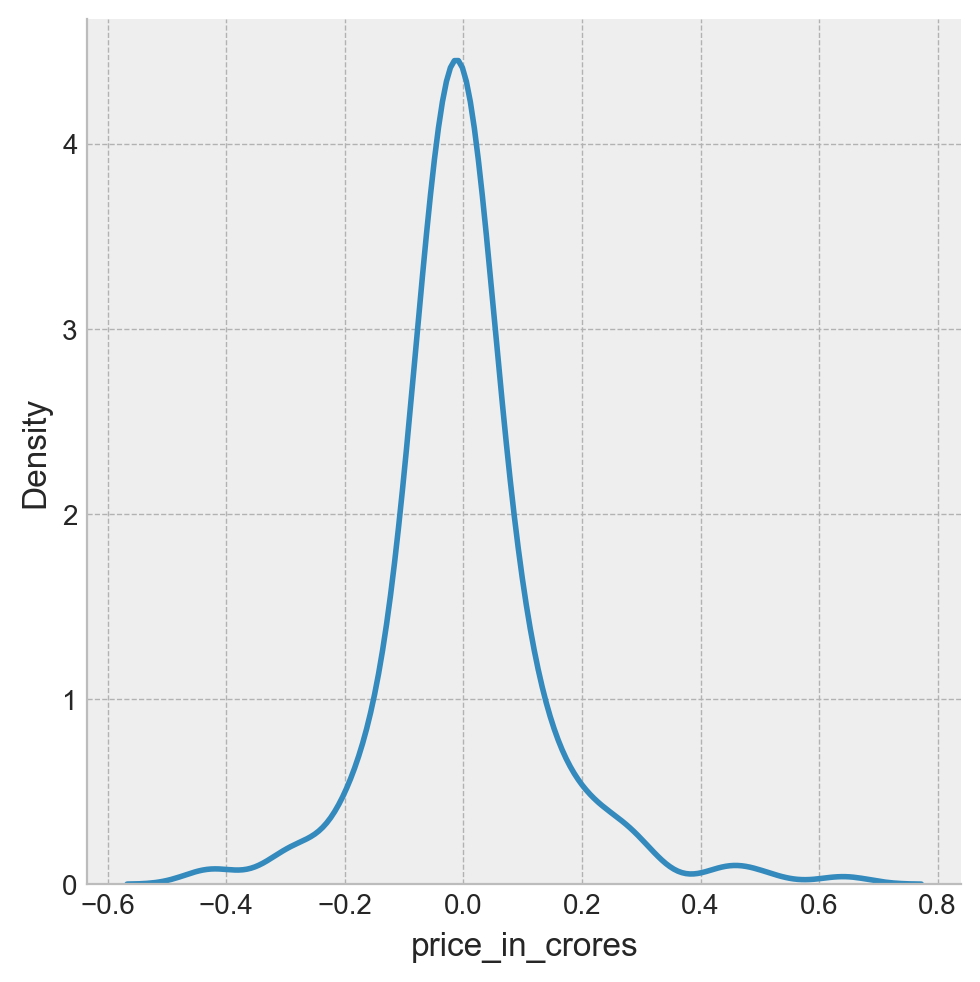

In [118]:
residual = y_train - y_train_pred

sns.displot(residual, kind='kde');

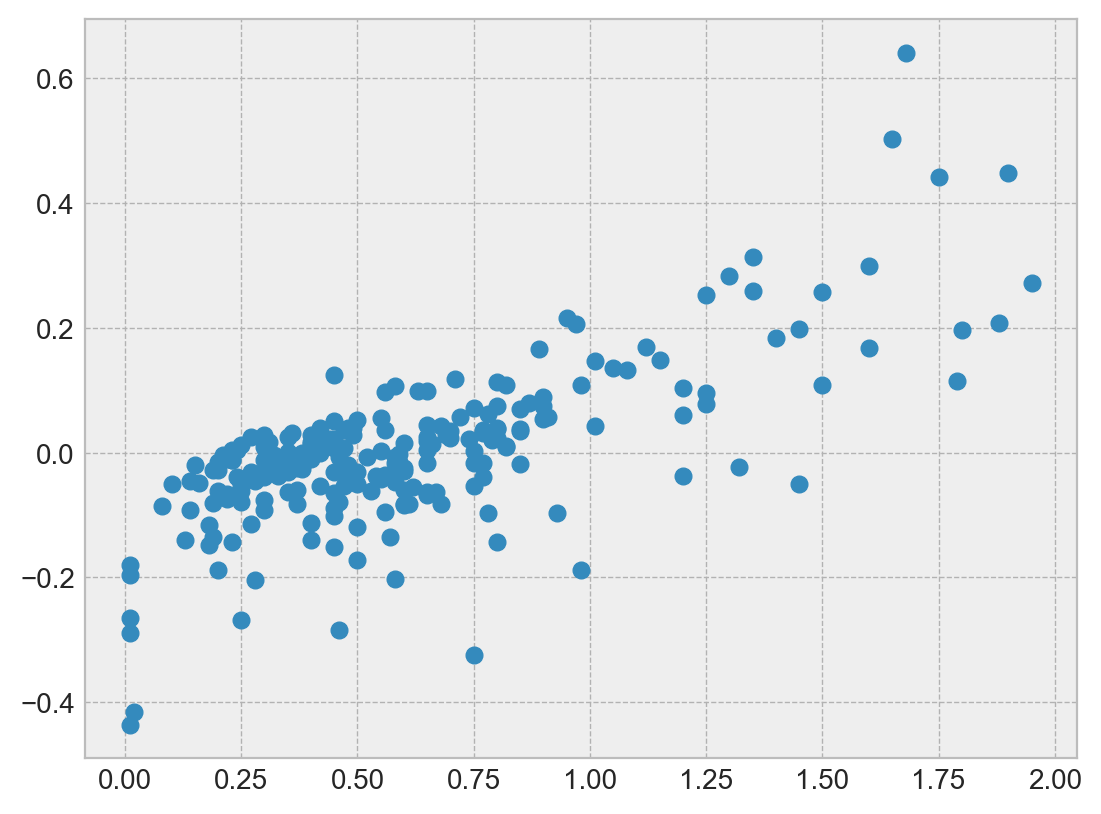

In [119]:
plt.scatter(y_train, residual)

plt.show();

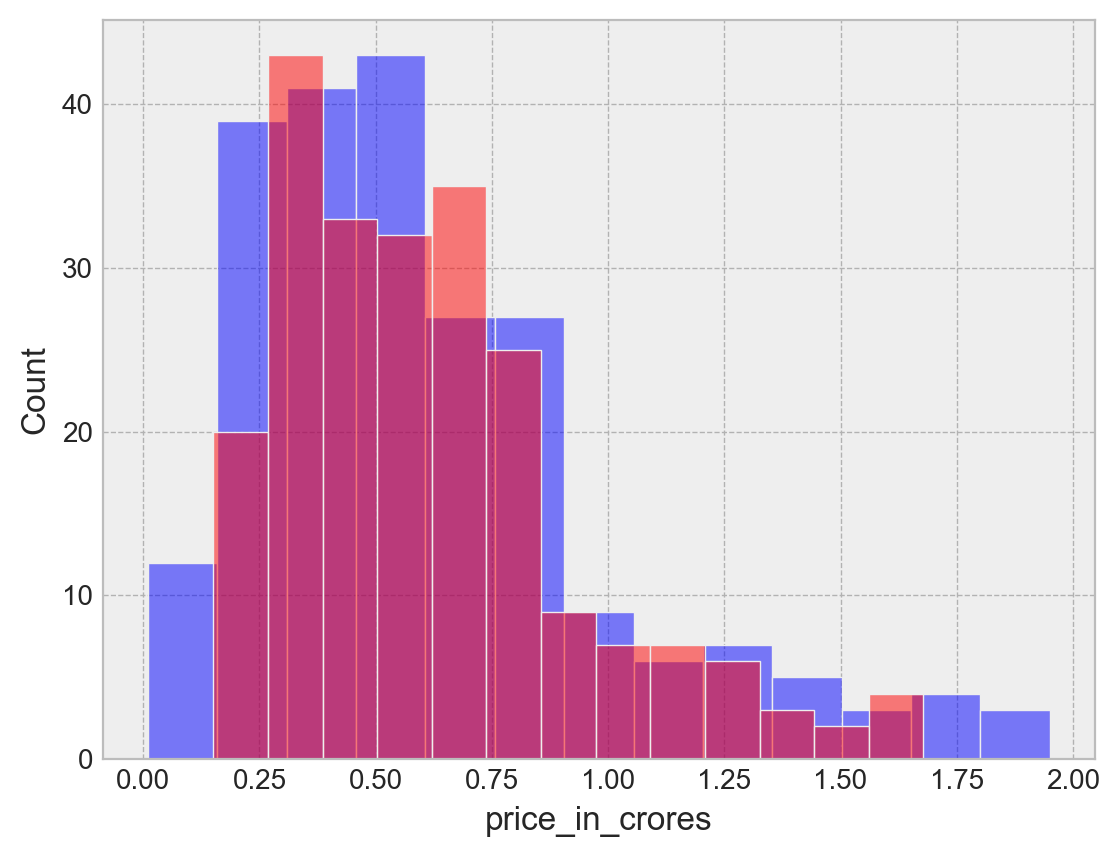

In [120]:
sns.histplot(y_train, color='blue', alpha=0.5)
sns.histplot(y_train_pred, color='red', alpha=0.5);

In [121]:
y_test_pred = regressor.predict(X_test_transform)

In [122]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
12,0.98,1.30740
169,0.48,1.28410
265,0.24,0.43010
18,0.35,0.55170
77,0.97,0.49860
...,...,...
134,0.34,0.38890
80,0.26,0.40166
136,0.22,0.52620
244,0.36,0.40870


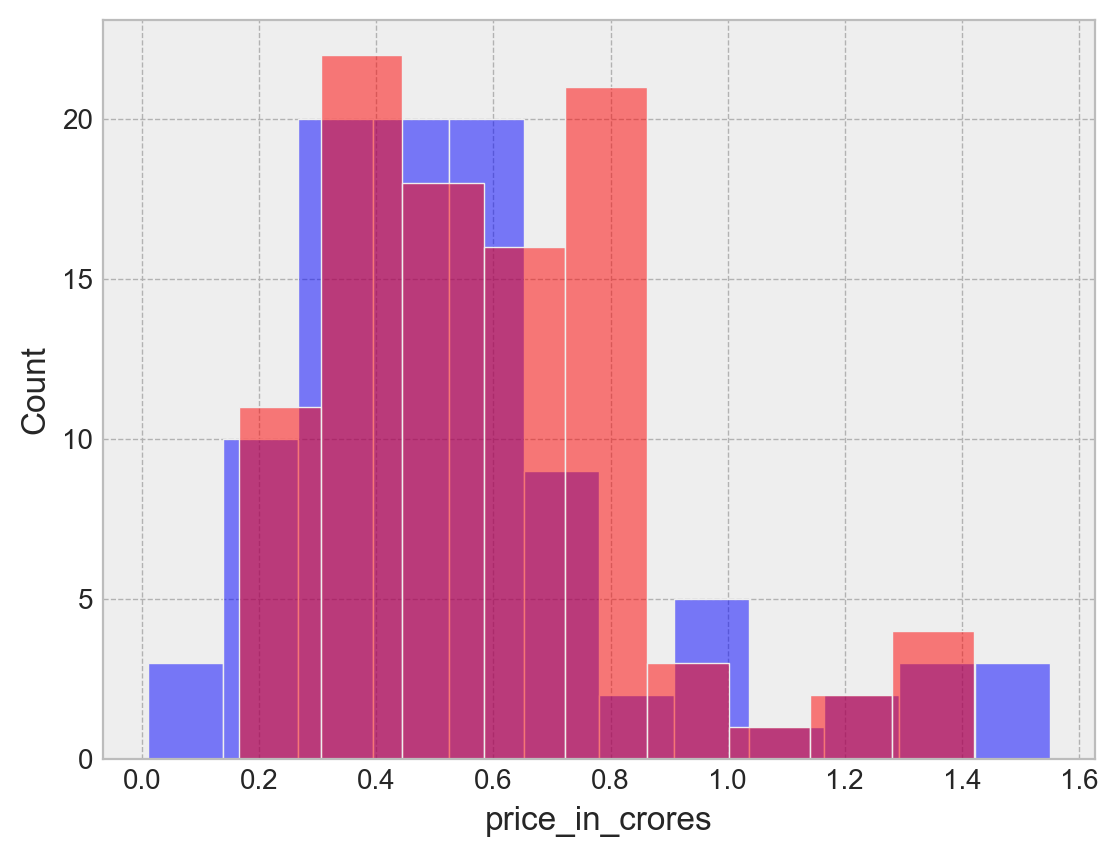

In [123]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [124]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  0.23972916666666674
Mean Squared Error:  0.1270135539799603
Root Mean Squared Error:  0.3563896098092091
